# Assigment 6 | Applied Machine Learning | Paras Ahuja

----

**Note: I will preprocess the data here to make sure it is in format that works for this assignment. I will not go into too much detail or comment on preprocessing the data because we have already covered this in assignment 3; I am simply copying and pasting some of the preprocessing code from assignment 3.**

----

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy import stats
from scipy import mean

### Preprocess

In [2]:
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.rename(columns={" gdp_for_year ($) ": "gdp_for_year", "gdp_per_capita ($)": "gdp_per_capita"}, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df = df.drop(columns=["HDI for year", "country-year"])
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [5]:
df['sex'] = df['sex'].replace({'female':0, 'male':1})
df['age'] = df['age'].replace({'5-14 years':10, '15-24 years':20, '25-34 years':30, '35-54 years':45, '55-74 years':65, '75+ years':80})
df['generation'] = df['generation'].replace({'G.I. Generation':1, 'Silent':2, 'Boomers':3, 'Generation X':4, 'Millenials':5, 'Generation Z':6})
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,1,20,21,312900,6.71,"2,156,624,900",796,4
1,Albania,1987,1,45,16,308000,5.19,"2,156,624,900",796,2
2,Albania,1987,0,20,14,289700,4.83,"2,156,624,900",796,4
3,Albania,1987,1,80,1,21800,4.59,"2,156,624,900",796,1
4,Albania,1987,1,30,9,274300,3.28,"2,156,624,900",796,3


In [6]:
df = df.drop(columns=['gdp_for_year']).copy()
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita,generation
0,Albania,1987,1,20,21,312900,6.71,796,4
1,Albania,1987,1,45,16,308000,5.19,796,2
2,Albania,1987,0,20,14,289700,4.83,796,4
3,Albania,1987,1,80,1,21800,4.59,796,1
4,Albania,1987,1,30,9,274300,3.28,796,3


We will use this as our dataframe to work with, and to answer the required questions. Note that we are keeping most of the features here. The reason for this is that some of these features may come in handy when answer our problems. So we will keep them in the dataframe, and only select the ones needed to answer our questions.

----

**Note: I have built the entire model/classifiers with question 6 in mind.**

----

### 1. What is the dependent variable you decided? Why?

Note that our data frame has the following features: 

1. country
2. year
3. sex
4. age
5. suicides_no
6. population
7. sucides/100k pop
8. gdp_per_capita
9. generation

Our goal is to answer questions like "what is the probability of a male, of this age, in that country to commit suicide?" In order to answer questions like these, we need to know the name of the country, year, age. Then we can say that we have a function $f(\text{country, year, age}) \mapsto P(s)$, where $P(s)$ is the probabiliy of suicide. Therefore, based on this iteration, we can say that our independent variables are country, year, age, sex, etc. And, our dependent variable will be based on suicides/100k pop, which we tackle in the next question.

### 2. Set the dependent variable into two categories based on a defensible criteria.(Hint: skirts of the probability density function)

Let's first look at the distribution of our target variable. Because we have a lot of data we will use bin size of 20.

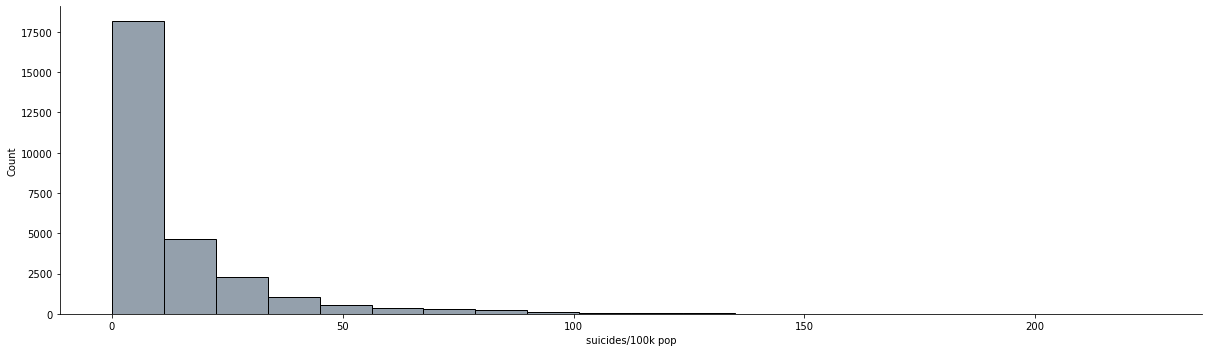

In [7]:
ax = sns.displot(df, x='suicides/100k pop', bins=20, color="slategrey")
ax.fig.set_size_inches(20,5)

We need to discretize this information to create two categories. We will create low/high category this will help us predict, given certain information, whether we have a high or low chance of a person committing suicide.

In [8]:
y_mean = np.mean(df['suicides/100k pop'].values)
y_std = np.std(df['suicides/100k pop'].values)
target = pd.cut(df['suicides/100k pop'], bins = [np.NINF, (y_mean+0.5*y_std), np.Infinity], labels=["Low", "High"])
df['target'] = target
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita,generation,target
0,Albania,1987,1,20,21,312900,6.71,796,4,Low
1,Albania,1987,1,45,16,308000,5.19,796,2,Low
2,Albania,1987,0,20,14,289700,4.83,796,4,Low
3,Albania,1987,1,80,1,21800,4.59,796,1,Low
4,Albania,1987,1,30,9,274300,3.28,796,3,Low


Now that we have this information, we need to make it easier for our model to classify. Therefore, we will convert the target label to 0/1; 0 represents low, and 1 represents high.

In [9]:
df['target'] = df['target'].replace({'Low': 0, 'High': 1})
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita,generation,target
0,Albania,1987,1,20,21,312900,6.71,796,4,0
1,Albania,1987,1,45,16,308000,5.19,796,2,0
2,Albania,1987,0,20,14,289700,4.83,796,4,0
3,Albania,1987,1,80,1,21800,4.59,796,1,0
4,Albania,1987,1,30,9,274300,3.28,796,3,0


Now we have set the dependent variable into two categories.

### 3. Develop your classification model(s) to solve your defined problem.

Before we build a model let's actually do some EDA and find out more information than we did in assignment 3. This will help us gain a deeper understanding of the features that we have. Sometimes interesting questions can arise during the EDA. Let's begin by finding out information about the preprocessed data.

#### EDA

In [10]:
df.shape

(27820, 10)

In [11]:
df.describe()[['age', 'suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita']]

,age,suicides_no,population,suicides/100k pop,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,41.703091,242.574407,1.844794e+06,12.816097,16866.464414
std,24.599168,902.047917,3.911779e+06,18.961511,18887.576472
min,10.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,20.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,45.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,65.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,80.000000,22338.000000,4.380521e+07,224.970000,126352.000000


We notice here that mean suicides/100k pop is 12.816, while the max is 224.97. Furthermore, mean age is 41.70, and the max age is 80.

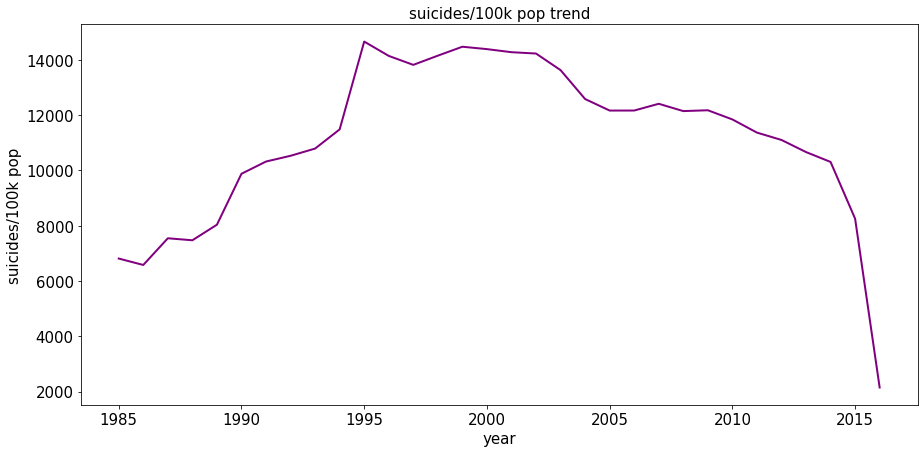

In [12]:
s = df['suicides/100k pop'].groupby(df.year).sum()
s.plot(figsize=(15,7), linewidth=2, fontsize=15, color='purple')
plt.xlabel('year', fontsize=15)
plt.ylabel('suicides/100k pop',fontsize=15)
plt.title("suicides/100k pop trend", fontsize=15)
plt.show()

We notice here that the suicides/100k pop have dropped significantly in the recent years as compared to the 1990s. We also notice that the suicides/100k pop started to rise after the 1985 and peaked around 1995 - 2000. It started to drop and dropped significantly in the recent years.

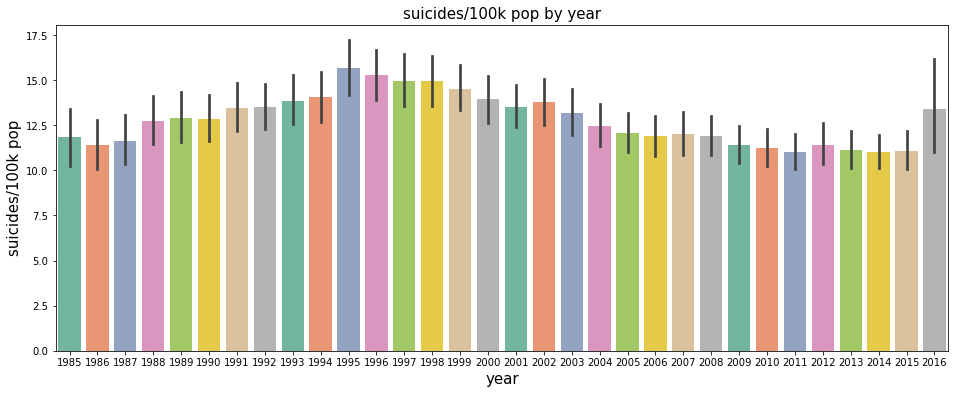

In [13]:
f,ax = plt.subplots(1,1,figsize=(16,6))
ax = sns.barplot(x = df['year'], y = 'suicides/100k pop', data=df, palette='Set2')
plt.xlabel('year', fontsize=15)
plt.ylabel('suicides/100k pop',fontsize=15)
plt.title("suicides/100k pop by year", fontsize=15)
plt.show()

Again we notice that 1995 was the year when the world experience highest sucide/100k pop. However, it appears that we are likely to witness an increase in this number as witnessed by the spike in 2016.

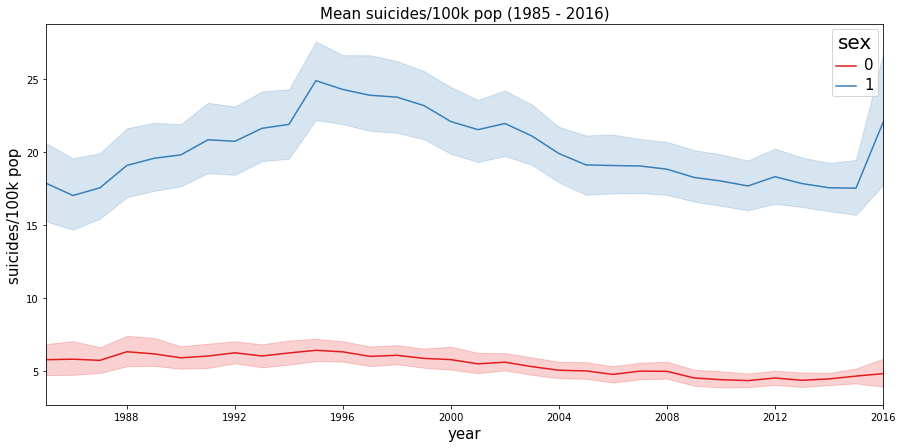

In [14]:
df["year_dt"] = pd.to_datetime(df["year"], format = "%Y")
data = df.groupby(["year_dt", "sex"]).agg("mean").reset_index()
fig, ax = plt.subplots(figsize=(15, 7))
ax = sns.lineplot(x = "year_dt", y = "suicides/100k pop", hue = "sex", data = df, palette="Set1")
plt.xlim("1985", "2016")
plt.xlabel("year", fontsize=15)
plt.ylabel("suicides/100k pop", fontsize=15)
plt.title("Mean suicides/100k pop (1985 - 2016)", fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.show()
df = df.drop(columns = "year_dt")

We notice here that suicide rates are rather high amongst men than women. In the recent years suicide amongst men are on the rise again but as a whole suicides/100k pop are down. Lastly, in assignment 3 we discovered that suicide/100k pop was rather in former soviet block countries. Next we can check information about generation and our target variable.

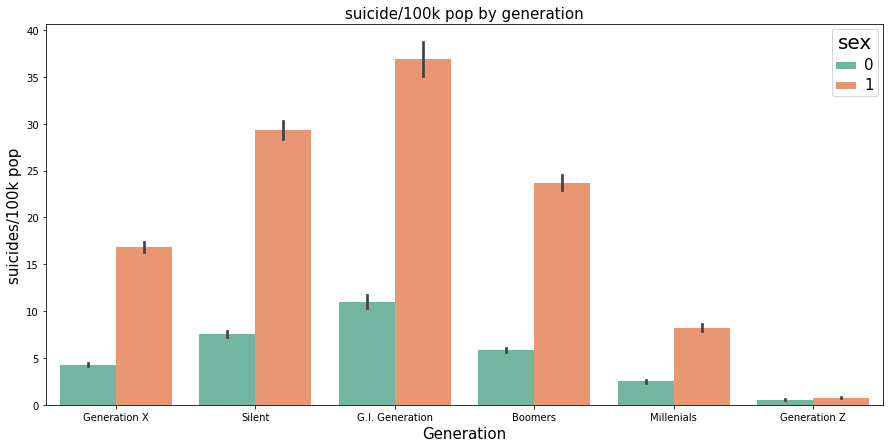

In [15]:
df['generation_label'] = df['generation'].replace({1: 'G.I. Generation', 2: 'Silent', 3: 'Boomers', 4: 'Generation X', 5: 'Millenials', 6: 'Generation Z'})
fig, ax = plt.subplots(1,1,figsize=(15,7))
ax = sns.barplot(x = df['generation_label'], y = 'suicides/100k pop', hue='sex',data=df, palette='Set2')
plt.xlabel("Generation", fontsize=15)
plt.ylabel("suicides/100k pop", fontsize=15)
plt.title("suicide/100k pop by generation", fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.show()
df = df.drop(columns = "generation_label")

We notice that suicide/100k pop is highest amongst G.I. Generation. Next we can find out the age group and suicide.

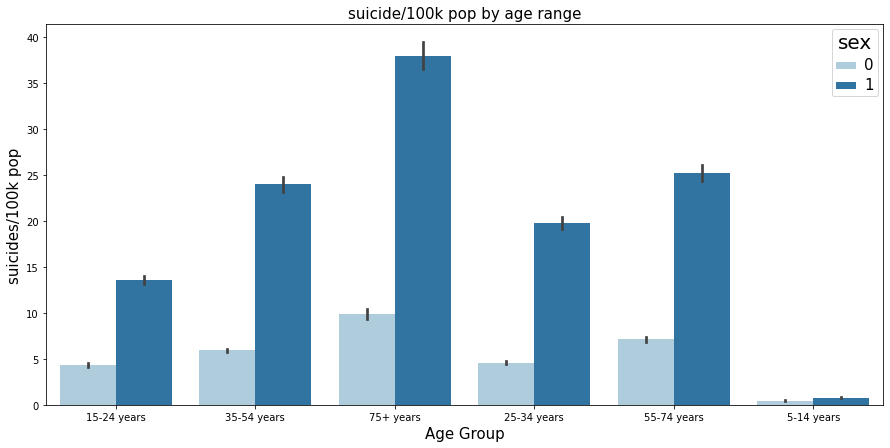

In [16]:
df['age_range'] = df['age'].replace({10: '5-14 years', 20: '15-24 years', 30: '25-34 years', 45: '35-54 years', 65: '55-74 years', 80: '75+ years'})
fig,ax = plt.subplots(1,1,figsize=(15,7))
ax = sns.barplot(x = df['age_range'], y = 'suicides/100k pop', hue='sex',data=df, palette='Paired')
plt.xlabel("Age Group", fontsize=15)
plt.ylabel("suicides/100k pop", fontsize=15)
plt.title("suicide/100k pop by age range", fontsize=15)
plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.show()
df = df.drop(columns = "age_range")

We notice that the G.I. Generation is people 75+ years old. In this age group suicide amongst men is the highest. However, could this because as we get older we are more likely to be alone, and depressed?

In [17]:
data = df.groupby(['country', 'year'])[['suicides/100k pop']].sum().reset_index()
data.sort_values(by='suicides/100k pop', ascending=False).head(10).style.background_gradient(cmap='rocket_r', subset=['suicides/100k pop'])

,country,year,suicides/100k pop
1255,Lithuania,1995,639.300000
1256,Lithuania,1996,595.610000
948,Hungary,1991,575.000000
1260,Lithuania,2000,571.800000
949,Hungary,1992,570.260000
1261,Lithuania,2001,568.980000
1752,Russian Federation,1994,567.640000
1258,Lithuania,1998,566.360000
1257,Lithuania,1997,565.440000
1259,Lithuania,1999,561.530000


We see that there are many instances of Lithuania here. Specifically we see 7 instances of Lithuania in top 10 when we sort by suicides/100k pop. This is really troubling to see about Lithuania. Let's find out how many times Lithuania appears in total.

In [18]:
data.sort_values(by='suicides/100k pop', ascending=False).loc[data['country'] == 'Lithuania'].count()[0]

22

We notice here that Lithuania appears 22 times on the list. Is it the maximum number of times? 

In [19]:
data.sort_values(by='suicides/100k pop', ascending=False)['country'].describe()

count        2321
unique        101
top       Austria
freq           32
Name: country, dtype: object

We notice that Iceland appears most often but Lithuania is definitely the worst performing country when it comes to suicides/100k pop. Let's start building the classifier now that we have enough understand of our data.

We can ask he following question: **Given information about the person, what can we say about the risk of suicide?**

#### Build classifiers

In assignment 3 we utilized 2 classifiers, and we use these classifiers here again. Should it turn out to be the case that these classifiers do not return high level of accuracy, we will re-examine the classifiers in the next section and test a new classifier. However, we believe that Random Forest Classifier will be sufficient on its own.

In [20]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

Let's check here what our dataframe looks like.

In [21]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita,generation,target
0,Albania,1987,1,20,21,312900,6.71,796,4,0
1,Albania,1987,1,45,16,308000,5.19,796,2,0
2,Albania,1987,0,20,14,289700,4.83,796,4,0
3,Albania,1987,1,80,1,21800,4.59,796,1,0
4,Albania,1987,1,30,9,274300,3.28,796,3,0


Not much has changed, which is good because we created a lot of graphs above and it is good to ensure that we do not have an unwanted feature or variable added onto the data. Not all the data is in the same format, and standardizing the data will probably not work in our favor. We will use the data as is.

In [22]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=6, criterion='gini', random_state=10)
nbc = GaussianNB()

Now that we have our classifiers, let's create a function that will help us with stratification.

In [23]:
def kfold(clf, X, y, splits=10, shuffle=True, random_state=10):
    score = []
    kfold = StratifiedKFold(n_splits=splits, shuffle=shuffle, random_state=random_state)
    for train_index, test_index in kfold.split(X, y):
        clfr = clf.fit(X[train_index], y[train_index])
        y_pred = clfr.predict(X[test_index])
        score += [accuracy_score(y[test_index], y_pred)]
    return (clfr, np.mean(np.array(score)))

In [24]:
def split(clf, X, y, test_size=0.2, random_state=10, shuffle=True):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, shuffle=shuffle)
    clfr = clf.fit(X_train, y_train)
    predictions = clfr.predict(X_test)
    return (clfr, accuracy_score(y_test, predictions))

In [25]:
y = df["target"]
le = LabelEncoder()
df['country_cat'] = le.fit_transform(df['country'])
df_copy = df.drop(columns=["target", "country"])
df_copy = df_copy.loc[:, df_copy.columns != "suicides/100k pop"]
X = np.array(df_copy)
y = np.array(y)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita,generation,target,country_cat
0,Albania,1987,1,20,21,312900,6.71,796,4,0,0
1,Albania,1987,1,45,16,308000,5.19,796,2,0,0
2,Albania,1987,0,20,14,289700,4.83,796,4,0,0
3,Albania,1987,1,80,1,21800,4.59,796,1,0,0
4,Albania,1987,1,30,9,274300,3.28,796,3,0,0


### 4. Evaluate (and report) the model performance(s) using some of the standard techniques (e.g. 80-20 split, 10-fold cross validation, etc.)

Let's check how our classifiers perform with kfold function, which uses StratifiedKFold method from sklearn and split function, which uses train_test_split.

#### Random Forest Classifier

In [26]:
rfc_kfold, accuracy = kfold(rfc, X, y)
print("Percentage Accuracy of Random Forest Classifier Using StratifiedKFold: {0:.3f}%".format(accuracy * 100))

Percentage Accuracy of Random Forest Classifier Using StratifiedKFold: 91.355%


A very high level of accuracy here. 

In [27]:
rfc_split, accuracy = split(rfc, X, y)
print("Percentage Accuracy of Random Forest Classifier Using train_test_split: {0:.3f}%".format(accuracy * 100))

Percentage Accuracy of Random Forest Classifier Using train_test_split: 91.733%


In both cases we obtain a high level of accuracy. We will stick with Random Forest Classifier in answering rest of the questions, however it is still worth finding out what how our other classifier performs.

#### Naive Bayes Classifier

In [28]:
nbc_kfold, accuracy = kfold(nbc, X, y)
print("Percentage Accuracy of Random Forest Classifier Using StratifiedKFold: {0:.3f}%".format(accuracy * 100))

Percentage Accuracy of Random Forest Classifier Using StratifiedKFold: 82.175%


In [29]:
nbc_split, accuracy = split(nbc, X, y)
print("Percentage Accuracy of Random Forest Classifier Using StratifiedKFold: {0:.3f}%".format(accuracy * 100))

Percentage Accuracy of Random Forest Classifier Using StratifiedKFold: 82.495%


As we can see Naive Bayes does not perform as well as the Random Forest Classifier. Therefore, in this instance Random Forest Classifier outshines Naibe Bayes.

#### Problem

Our goal is to solve a problem. In answer to question 3 we built classifiers that we want to use to solve our problem, let say that our problem is the following: 

What is the suicide risk of a **40** year old **male** living in **Lithuania** in **1999**?

In [30]:
df_copy.head()

,year,sex,age,suicides_no,population,gdp_per_capita,generation,country_cat
0,1987,1,20,21,312900,796,4,0
1,1987,1,45,16,308000,796,2,0
2,1987,0,20,14,289700,796,4,0
3,1987,1,80,1,21800,796,1,0
4,1987,1,30,9,274300,796,3,0


In [31]:
def predictor(df, clf, le, year, sex, age, suicides_no=None, population=None, gdp_per_capita=None, generation=None, country=None, probability=False):
    generation_dict = {'G.I. Generation':1, 'Silent':2, 'Boomers':3, 'Generation X':4, 'Millenials':5, 'Generation Z':6}
    
    if generation:
        generation = generation_dict[generation]
    
    if sex == 'male': 
        sex = 1
    elif sex == 'female':
        sex = 0
        
    if country is None:
        X = []
        for country_cat in range(101):
            temp = []
            c = df.loc[(df["year"] == year) & (df["sex"] == sex) & (df["age"] <= age) & (df["country_cat"] == country_cat)].mean()
            suicides_no = float(c[3])
            population = float(c[4])
            gdp_per_capita = float(c[5])
            generation = float(c[6])
            country = country_cat
            if not math.isnan(suicides_no) and not math.isnan(population) and not math.isnan(gdp_per_capita) and not math.isnan(generation):
                temp.append(year)
                temp.append(sex)
                temp.append(age)
                temp.append(suicides_no)
                temp.append(population)
                temp.append(gdp_per_capita)
                temp.append(generation)
                temp.append(country_cat)
                X.append(temp)
        predictions = []
        
        if probability:
            for x in X:
                prediction = clf.predict_log_proba([x])
                predictions.append(prediction)
            return np.mean(predictions)
        else:
            for x in X:
                prediction = clf.predict([x])
                predictions.append(prediction)
            
            return stats.mode(predictions)[0][0][0]
    
    else:
        
        X = [year, sex, age]
        
        if suicides_no is None:
            mean = df.loc[(df["year"] == year) & (df["sex"] == sex) & (df["age"] <= age)]['suicides_no'].mean()
            X.append(mean)
        else:
            X.append(suicides_no)
            
        if population is None:
            mean = df.loc[(df["year"] == year) & (df["sex"] == sex) & (df["age"] <= age)]['population'].mean()
            X.append(mean)
        else:
            X.append(population)
            
        if gdp_per_capita is None:
            mean = df.loc[(df["year"] == year) & (df["sex"] == sex) & (df["age"] <= age)]['gdp_per_capita'].mean()
            X.append(mean)
        else:
            X.append(gdp_per_capita)
            
        if generation is None:
            mean = df.loc[(df["year"] == year) & (df["sex"] == sex) & (df["age"] <= age)]['generation'].mean()
            X.append(mean)
        else:
            X.append(generation)

        X.append(le.fit_transform([country])[0])
                
        return clf.predict_log_proba([X]) if probability else clf.predict([X])
    

In [32]:
prediction = predictor(df, rfc_kfold, le, year=1999, sex='male', age=40, country="Lithuania")[0]
print("Suicide risk of a 40 year old male living in Lithuania in 1999 is: {}".format('Low' if prediction == 0 else 'High'))

Suicide risk of a 40 year old male living in Lithuania in 1999 is: Low


So we predict that suicide risk of a 40 year old male living in Lithuania in 1999 is low.

### 5. Using your classifier model, what is the predicted category of your dependent variable for the input: "year=2000, generation=Generation X, age=20, gender=male" ?

In [33]:
prediction = predictor(df, rfc_kfold, le, year=2000, generation='Generation X', age=20, sex='male')
print("Predicted category of the dependent variable for the input: 'year=2000, generation=Generation X, age=20, gender=male' is: {}".format('Low' if prediction == 0 else 'High'))

Predicted category of the dependent variable for the input: 'year=2000, generation=Generation X, age=20, gender=male' is: Low


This seems to be the case because note that vast majority of the data has been classified as low. We have to contend with the fact that we have focused our energies towards the highest ranking countries. However, there are 101 countries in our dataset, and only a handful of countries are listed frequently for high rates.

### 6. Using your(perhaps a different?) model, what is the actual probability of a "Generation X 20-year-old male living in a country with 40000 gdp_per_capita" would commit suicide?

The above model was designed with this question in mind, and therefore, we attempt to make a prediction and see what probability we get. We will then attempt to verify this probability.

In [34]:
prediction = predictor(df, rfc_kfold, le, year=1995, generation='G.I. Generation', age=70, sex='male', probability=True)
print("Probability of a Generation X 20-year-old male in year 2000 would commit suicide is: {0:.7f}".format(np.exp(prediction)/100000))

Probability of a Generation X 20-year-old male in year 2000 would commit suicide is: 0.0000044


In [35]:
predictions = []
years = df['year'].unique()
for year in years:
    prediction = predictor(df, rfc_kfold, le, year=year, generation='Generation X', age=20, sex='male', gdp_per_capita=40000, probability=True)
    predictions.append(prediction)

In [36]:
print("Probability of a Generation X 20-year-old male living in a country with 40000 gdp_per_capita would commit suicide is: {0:.7f}".format(np.exp(np.mean(predictions))/100000))

Probability of a Generation X 20-year-old male living in a country with 40000 gdp_per_capita would commit suicide is: 0.0000033


Let's test to see what the probability is for a person if they are Gen X living in a country with a GDP/capita of 40,000.

In [37]:
predictions = []
years = df['year'].unique()
for year in years:
    prediction = predictor(df, rfc_kfold, le, year=year, generation='Generation X', age=40, sex='male', gdp_per_capita=40000, probability=True)
    predictions.append(prediction)

In [38]:
print("Probability of a Generation X 40-year-old male living in a country with 40000 gdp_per_capita would commit suicide is: {0:.7f}".format(np.exp(np.mean(predictions))/100000))

Probability of a Generation X 40-year-old male living in a country with 40000 gdp_per_capita would commit suicide is: 0.0000041


We see here that the probability for this person has gone up as they have aged to 0.413. We should be concerned as the probability is increasing.